## Crypto Arbitrage

In this project, I'm sorting through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. I will apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collecting the data.

2. Preparing the data.

3. Analyzing the data. 



###  Importing the required libraries and dependencies.

In [23]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collecting the Data

In [24]:
# Reading in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Setting the index to the column "Date"
# Setting the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('Resources/bitstamp.csv'),
    index_col = "Timestamp",
    parse_dates = True,
    infer_datetime_format = True)

In [25]:
# confirming that the data was imported properly.
display(bitstamp.head())
display(bitstamp.tail())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


Repeating the above steps for `coinbase.csv` file.

In [26]:
# Reading in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Setting the index to the column "Timestamp"
# Setting the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('Resources/coinbase.csv'),
    index_col = "Timestamp",
    parse_dates = True,
    infer_datetime_format = True)

In [27]:

display(coinbase.head())
display(coinbase.tail())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Preparing the Data


In [28]:
# For the bitstamp DataFrame, dropping all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna()
bitstamp

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


In [33]:
# Using the str.replace function to remove the dollar sign, 
bitstamp['Close'] = bitstamp['Close'].str.replace('$',' ')
bitstamp

<ipython-input-33-d44e34e13d7e>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  bitstamp['Close'] = bitstamp['Close'].str.replace('$',' ')


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


### Converting the data type of the Close column to a `float`.

In [37]:
# Converting the Close data type to a float
bitstamp['Close'] = bitstamp['Close'].astype(float)
bitstamp

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


### Reviewing the data for duplicated values, and drop them if necessary.

In [38]:
# Reviewing the data for duplicate values, and drop them if necessary
bitstamp.duplicated()
bitstamp = bitstamp.drop_duplicates()
#verification
bitstamp.duplicated().sum()

0

### Repeating for the coinbase DataFrame.

In [39]:

display(coinbase.describe())
coinbase


,Open,High,Low,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,959.084903,1.152334e+07,17177.995495


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747


In [40]:
display(coinbase.head())
display(coinbase.tail())


#coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")
#coinbase.dtypes


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


In [41]:
coinbase = coinbase.dropna()
coinbase

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747


In [47]:
coinbase['Close'] = coinbase['Close'].str.replace('$', ' ')
coinbase.head()

<ipython-input-47-2956b4f59f66>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  coinbase['Close'] = coinbase['Close'].str.replace('$', ' ')
<ipython-input-47-2956b4f59f66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coinbase['Close'] = coinbase['Close'].str.replace('$', ' ')


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [48]:
coinbase['Close'] = coinbase['Close'].astype(float)
coinbase.head()

<ipython-input-48-d32bfc0babed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coinbase['Close'] = coinbase['Close'].astype(float)


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [49]:
coinbase = coinbase.drop_duplicates()
coinbase

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.00,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747


## Analyzing the Data

My analysis will consist of the following: 

1. Choosing the columns of data on which to focus the analysis.

2. Getting the summary statistics and plotting the data.

3. Focusing the analysis on specific dates.

4. Calculating the arbitrage profits.

In [50]:
# Using loc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,'Close']
# Reviewing the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [51]:
# Using loc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:,'Close']

# Reviewing the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Getting summary statistics and plotting the data.

Sorting through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities.

In [52]:
# Generating the summary statistics for the bitstamp DataFrame
print(bitstamp_sliced)

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
                         ...   
2018-03-31 23:55:00     6922.56
2018-03-31 23:56:00     6920.32
2018-03-31 23:57:00     6934.72
2018-03-31 23:58:00     6927.65
2018-03-31 23:59:00     6928.01
Name: Close, Length: 129067, dtype: float64


In [53]:
# Generating the summary statistics for the coinbase DataFrame
print(coinbase_sliced)

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
                         ...   
2018-03-31 23:55:00     6930.00
2018-03-31 23:56:00     6930.01
2018-03-31 23:57:00     6933.91
2018-03-31 23:58:00     6937.31
2018-03-31 23:59:00     6934.00
Name: Close, Length: 129322, dtype: float64


<AxesSubplot:title={'center':'Bitstamp'}, xlabel='Timestamp'>

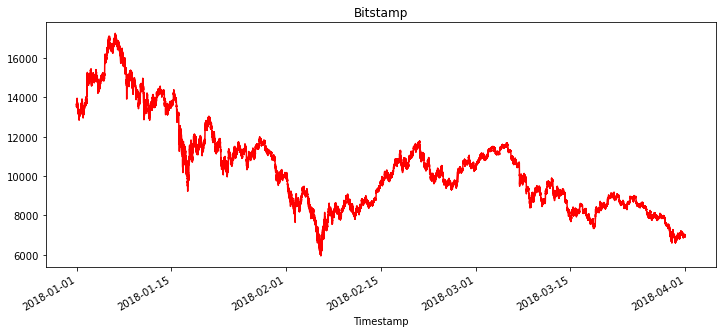

In [54]:
# Creating a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Tailoring figure size, title and color to each visualization
bitstamp["Close"].plot(figsize=(12, 5), title="Bitstamp", color= "red")

<AxesSubplot:title={'center':'Coinbase'}, xlabel='Timestamp'>

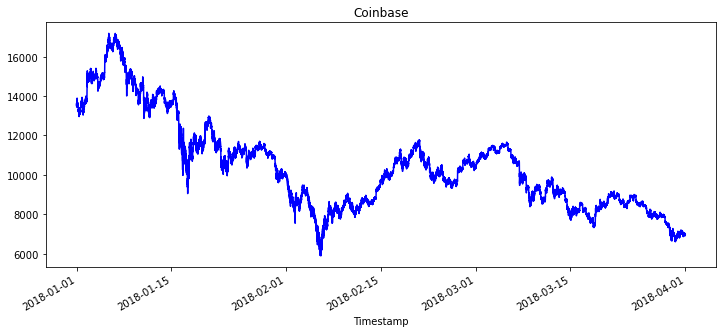

In [58]:
# Creating a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Tailoring figure size, title and color to each visualization
coinbase["Close"].plot(figsize=(12, 5), title="Coinbase", color='blue')

<AxesSubplot:title={'center':'Overlayplot1'}, xlabel='Timestamp'>

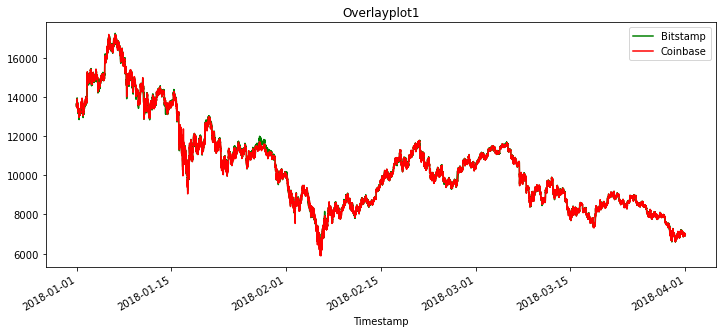

In [59]:
# Overlaying the visualizations for the bitstamp and coinbase DataFrames in one plot
bitstamp["Close"].plot(legend=True, figsize=(12, 5), title="Overlayplot1", color="green", label="Bitstamp")
coinbase["Close"].plot(legend=True, figsize=(12, 5), color="red", label="Coinbase")

<AxesSubplot:title={'center':'overlay plot results'}, xlabel='Timestamp'>

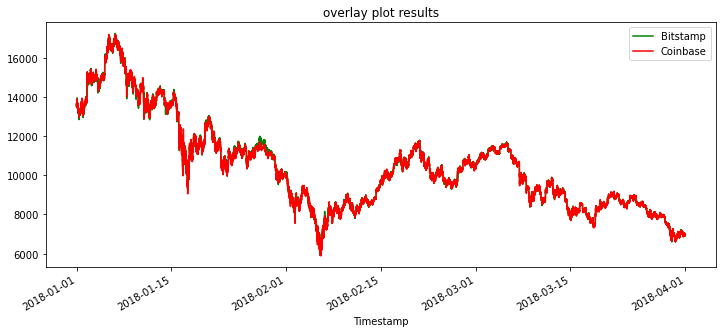

In [60]:
# Usinging the loc and plot functions to create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
bitstamp["Close"].plot(legend=True, figsize=(12, 5), 
                       title="overlay plot results", 
                       color="green", label="Bitstamp")
coinbase["Close"].plot(legend=True, figsize=(12, 5),
                       color="red", label="Coinbase")

<AxesSubplot:title={'center':'overlay'}, xlabel='Timestamp'>

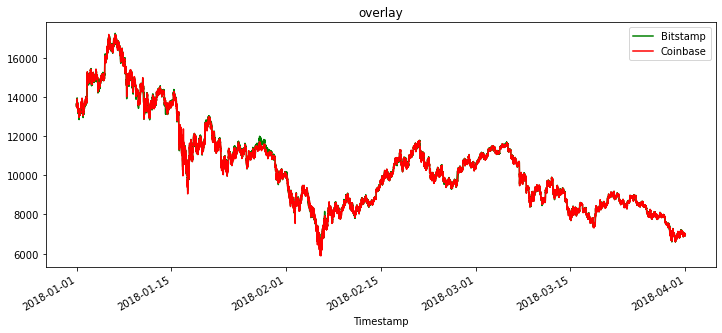

In [61]:
# Using the loc and plot functions to create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset 
bitstamp["Close"].plot(legend=True, figsize=(12, 5), title="overlay", color="green", label="Bitstamp")
coinbase["Close"].plot(legend=True, figsize=(12, 5), color="red", label="Coinbase")

Based on the visualizations of the different time periods, the degree of spread change as time progressed has decreased.



### Focusing the Analysis on Specific Dates


<AxesSubplot:title={'center':'overlaymarch'}, xlabel='Timestamp'>

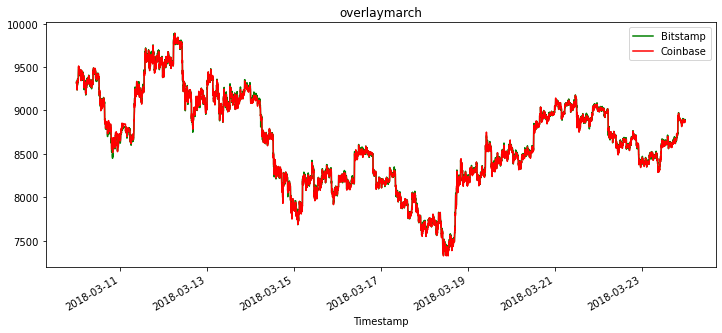

In [63]:
# Creating an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Including the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp["Close"].loc['2018-03-10':'2018-03-23'].plot(legend=True, figsize=(12, 5), title="overlaymarch", color="green", label="Bitstamp")
coinbase["Close"].loc['2018-03-10':'2018-03-23'].plot(legend=True, figsize=(12, 5), color="red", label="Coinbase")

In [64]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase['Close'].loc['2018-03-10':'2018-03-23'] - bitstamp['Close'].loc['2018-03-10':'2018-03-23']

# Generating summary statistics for the early DataFrame
arbitrage_spread_early

Timestamp
2018-03-10 00:00:00     5.88
2018-03-10 00:01:00    -6.88
2018-03-10 00:02:00   -15.98
2018-03-10 00:03:00   -11.25
2018-03-10 00:04:00    -3.72
                       ...  
2018-03-23 23:55:00    -2.78
2018-03-23 23:56:00    -2.78
2018-03-23 23:57:00    -9.44
2018-03-23 23:58:00    -2.70
2018-03-23 23:59:00    -3.76
Name: Close, Length: 20100, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread'}>

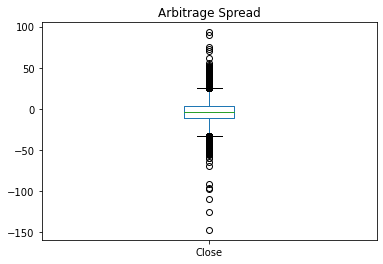

In [65]:
# Visualizing the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box', title = "Arbitrage Spread")

<AxesSubplot:title={'center':'March'}, xlabel='Timestamp'>

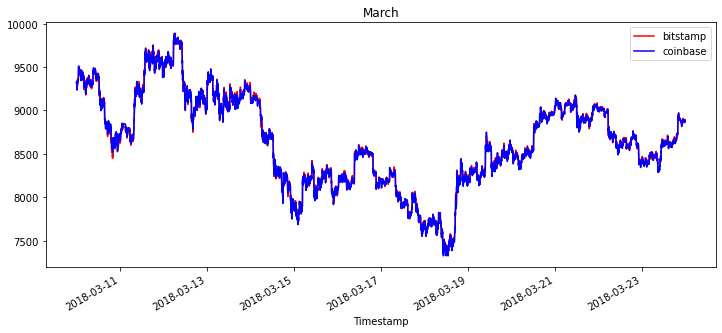

In [66]:
# Creating an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Including the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-03-10':'2018-03-23'].plot(legend = True, figsize = (12,5), title = "March", color="red", label= "bitstamp")
coinbase['Close'].loc['2018-03-10':'2018-03-23'].plot(legend = True, figsize = (12,5), title = "March", color="blue", label= "coinbase")

In [67]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase['Close'].loc['2018-03-10':'2018-03-23'] - bitstamp['Close'].loc['2018-03-10':'2018-03-23']

arbitrage_spread_middle

Timestamp
2018-03-10 00:00:00     5.88
2018-03-10 00:01:00    -6.88
2018-03-10 00:02:00   -15.98
2018-03-10 00:03:00   -11.25
2018-03-10 00:04:00    -3.72
                       ...  
2018-03-23 23:55:00    -2.78
2018-03-23 23:56:00    -2.78
2018-03-23 23:57:00    -9.44
2018-03-23 23:58:00    -2.70
2018-03-23 23:59:00    -3.76
Name: Close, Length: 20100, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Middle Spread'}>

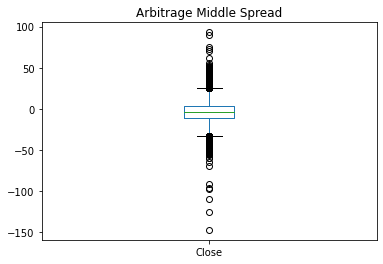

In [68]:
# Visualizing the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box', title="Arbitrage Middle Spread")

<AxesSubplot:title={'center':'March'}, xlabel='Timestamp'>

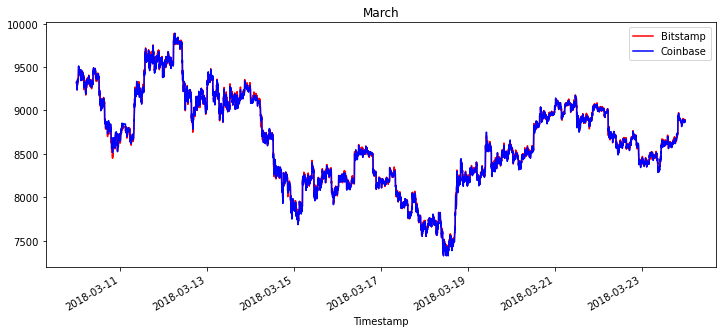

In [69]:
# Creating an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Including the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-03-10':'2018-03-23'].plot(legend=True, figsize=(12,5), title="March", color="red", label="Bitstamp")
coinbase['Close'].loc['2018-03-10':'2018-03-23'].plot(legend=True, figsize=(12,5), title="March", color="blue", label="Coinbase")

In [70]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase['Close'].loc['2018-03-10':'2018-03-23'] - bitstamp['Close'].loc['2018-03-10':'2018-03-23']

# Generating summary statistics for the late DataFrame
arbitrage_spread_late

Timestamp
2018-03-10 00:00:00     5.88
2018-03-10 00:01:00    -6.88
2018-03-10 00:02:00   -15.98
2018-03-10 00:03:00   -11.25
2018-03-10 00:04:00    -3.72
                       ...  
2018-03-23 23:55:00    -2.78
2018-03-23 23:56:00    -2.78
2018-03-23 23:57:00    -9.44
2018-03-23 23:58:00    -2.70
2018-03-23 23:59:00    -3.76
Name: Close, Length: 20100, dtype: float64

<AxesSubplot:title={'center':'Artbitrage Spread'}>

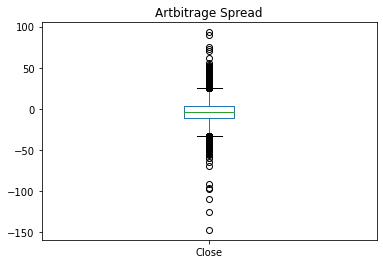

In [71]:
# Visualizing the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box', title = "Artbitrage Spread")

### Calculating the Arbitrage Profits

I will calculate the potential profits for each date that I selected in the previous section. My goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. 

1. For each of the three dates, I will measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then I will use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, I will calculate the spread returns. To do so, I will divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange we are buying on (the lower-priced exchange).

3. For each of the three dates, I will narrow down the trading opportunities even further. To do so, I will determine the number of times my trades with positive returns exceed the 1% minimum threshold that I need to cover my costs.


In [72]:
# For the date early in the dataset, I am measuring the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase['Close'].loc['2018-03-10':'2018-03-23'] - bitstamp['Close'].loc['2018-03-10':'2018-03-23']

# Using a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early[arbitrage_spread_early > 0 ]

Timestamp
2018-03-10 00:00:00     5.88
2018-03-10 00:06:00     4.68
2018-03-10 00:08:00     7.39
2018-03-10 00:18:00    16.01
2018-03-10 00:19:00     7.52
                       ...  
2018-03-23 23:25:00     0.42
2018-03-23 23:26:00     2.52
2018-03-23 23:27:00     3.80
2018-03-23 23:32:00     2.93
2018-03-23 23:33:00     4.91
Name: Close, Length: 6864, dtype: float64

In [73]:
# For the date early in the dataset, I am calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early[arbitrage_spread_early > 0 ] / bitstamp['Close'].loc['2018-03-10':'2018-03-23']

# Review the spread return DataFrame
spread_return_early

Timestamp
2018-03-10 00:00:00    0.000631
2018-03-10 00:01:00         NaN
2018-03-10 00:02:00         NaN
2018-03-10 00:03:00         NaN
2018-03-10 00:04:00         NaN
                         ...   
2018-03-23 23:55:00         NaN
2018-03-23 23:56:00         NaN
2018-03-23 23:57:00         NaN
2018-03-23 23:58:00         NaN
2018-03-23 23:59:00         NaN
Name: Close, Length: 19973, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [74]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early

Timestamp
2018-03-10 19:04:00    0.010801
2018-03-14 05:40:00    0.010217
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [75]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
≈.describe()

count    2.000000
mean     0.010509
std      0.000413
min      0.010217
25%      0.010363
50%      0.010509
75%      0.010655
max      0.010801
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [80]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp['Close'].loc['2018-03-10':'2018-03-23']
profit_early

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_early

Timestamp
2018-03-10 00:00:00   NaN
2018-03-10 00:01:00   NaN
2018-03-10 00:02:00   NaN
2018-03-10 00:03:00   NaN
2018-03-10 00:04:00   NaN
                       ..
2018-03-23 23:55:00   NaN
2018-03-23 23:56:00   NaN
2018-03-23 23:57:00   NaN
2018-03-23 23:58:00   NaN
2018-03-23 23:59:00   NaN
Name: Close, Length: 19973, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [ ]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE

In [ ]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [ ]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [ ]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = # YOUR CODE HERE

In [ ]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE